# Dr. Semmelweis Handwashing Survey Data

In 1847 the Hungarian physician Ignaz Semmelweis makes a breakthough discovery: He discovers handwashing. Contaminated hands was a major cause of childbed fever and by enforcing handwashing at his hospital he saved hundreds of lives.

This data is based on the research of Dr. Semmelweis on Handwashing.

There are two tables in this data for number of births and deaths: one is yearly with clinics and another one is monthly. 

Lets explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.options.display.max_columns = None
pd.options.display.max_rows = None

CSS = """
          .output {
              flex-direction: row;
          } 
          """
HTML('<style>{}</style>'.format(CSS))

In [2]:
monthly_deaths=pd.read_csv("monthly_deaths.csv")
yearly_deaths = pd.read_csv("yearly_deaths_by_clinic.csv")

First of all we are going to check the shape and column types for the data

In [3]:
print("monthly deaths shape: ",monthly_deaths.shape)
print("yearly deaths shape: ", yearly_deaths.shape)

monthly deaths shape:  (98, 3)
yearly deaths shape:  (12, 4)


Looks like this is a very small dataset

In [4]:
print("Monthly deaths column types: \n",monthly_deaths.dtypes)
display(monthly_deaths.head())

Monthly deaths column types: 
 date      object
births     int64
deaths     int64
dtype: object


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [5]:
print("Yearly deaths column types: \n", yearly_deaths.dtypes)
display(yearly_deaths.head())

Yearly deaths column types: 
 year       int64
births     int64
deaths     int64
clinic    object
dtype: object


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In the monthly deaths table the first column is for date which is unique key to the table but the column type is object

So we are going to set dtype as datetime.

In [6]:
monthly_deaths['date'] = pd.to_datetime(monthly_deaths['date'])
display(monthly_deaths.dtypes)

date      datetime64[ns]
births             int64
deaths             int64
dtype: object

In [7]:
display(monthly_deaths.describe())
display(yearly_deaths.describe())
display(yearly_deaths.clinic.unique())

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


array(['clinic 1', 'clinic 2'], dtype=object)

In [8]:
display(monthly_deaths.isnull().any())
display(yearly_deaths.isnull().any())

date      False
births    False
deaths    False
dtype: bool

year      False
births    False
deaths    False
clinic    False
dtype: bool

So we don't have any null values in our tables. 

And the yearly data is for two clinics: 'clinic 1', 'clinic 2'

According to the articles I found the two clinics that Dr. Semmelweis studied the first one was with all male doctors and medical students, while the other one only the midwives.

The clinic with doctors had more rate of death than clinic with midwives

Now that we know that our data is clean, we can start our exploration of dataset

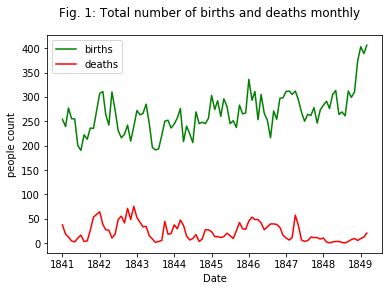

In [9]:
plt.plot(monthly_deaths.date, monthly_deaths.births, color='g', label="births")
plt.plot(monthly_deaths.date, monthly_deaths.deaths, color='r', label="deaths")
plt.xlabel("Date")
plt.ylabel("people count")
plt.legend(loc="upper left")
plt.suptitle("Fig. 1: Total number of births and deaths monthly")
_ = plt.plot()

Next we are going to plot a percentage graph for number of deaths out of total number of births in that month

In [10]:
monthly_deaths['percent'] = monthly_deaths.deaths *100 / monthly_deaths.births

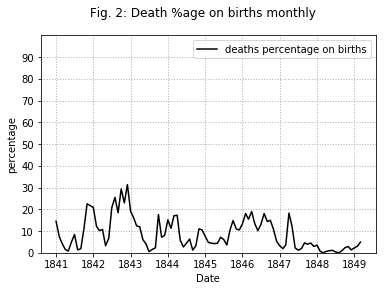

In [11]:
plt.plot(monthly_deaths.date, monthly_deaths.percent, color='black', label="deaths percentage on births")
plt.ylabel("percentage")
plt.xlabel("Date")
plt.ylim(0,100)
plt.yticks(range(0,100, 10))
plt.grid(linestyle='dotted', linewidth=1)
plt.legend(loc="upper right")
plt.suptitle("Fig. 2: Death %age on births monthly")
_ = plt.plot()

The rate is not consistent but we can see that the max value is almost 30%

Next we are going to explore the yearly data for each clinic

In [12]:
yearly_deaths['percent'] = yearly_deaths.deaths *100/ yearly_deaths.births
clinic1 = yearly_deaths[yearly_deaths['clinic']=='clinic 1']
clinic2 = yearly_deaths[yearly_deaths['clinic']=='clinic 2']

In [13]:
print("total records in clinic 1: ", len(clinic1))
print("total records in clinic 2: ", len(clinic2))

total records in clinic 1:  6
total records in clinic 2:  6


In [14]:
display(clinic1.describe())
display(clinic2.describe())

,year,births,deaths,percent
count,6.000000,6.000000,6.000000,6.000000
mean,1843.500000,3340.333333,331.500000,9.850527
std,1.870829,368.542354,123.755808,3.278539
min,1841.000000,3036.000000,237.000000,6.901489
25%,1842.250000,3084.250000,245.750000,7.913660
50%,1843.500000,3222.000000,267.000000,8.594958
75%,1844.750000,3440.750000,412.750000,10.823350
max,1846.000000,4010.000000,518.000000,15.759051


,year,births,deaths,percent
count,6.000000,6.000000,6.000000,6.000000
mean,1843.500000,2965.166667,115.166667,4.039994
std,1.870829,472.656077,55.715049,2.249374
min,1841.000000,2442.000000,66.000000,2.036409
25%,1842.250000,2679.000000,72.500000,2.424559
50%,1843.500000,2847.500000,95.500000,3.159360
75%,1844.750000,3169.750000,149.250000,5.371116
max,1846.000000,3754.000000,202.000000,7.596841


We can see in the above outputs that both clinics have same number of records with data from year 1841 to 1846

We can say that Dr. Semmelweis compared date from these two clinics for his experiments with the same time frame. With clinic1 having more rate of death than clinic2.

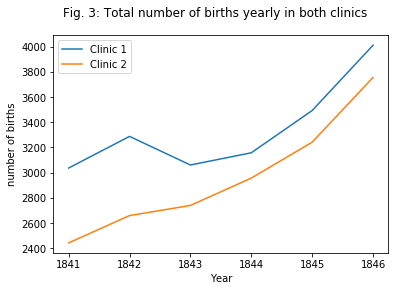

In [15]:
plt.plot(clinic1.year, clinic1.births, label="Clinic 1")
plt.plot(clinic2.year, clinic2.births, label="Clinic 2")
plt.legend(loc="best")
plt.ylabel("number of births")
plt.xlabel("Year")
plt.suptitle("Fig. 3: Total number of births yearly in both clinics")
_ = plt.plot()

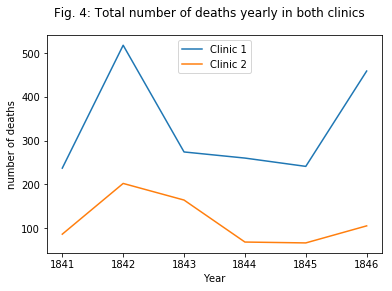

In [16]:
plt.plot(clinic1.year, clinic1.deaths, label="Clinic 1")
plt.plot(clinic2.year, clinic2.deaths, label="Clinic 2")
plt.legend(loc="best")
plt.ylabel("number of deaths")
plt.xlabel("Year")
plt.suptitle("Fig. 4: Total number of deaths yearly in both clinics")
_ = plt.plot()

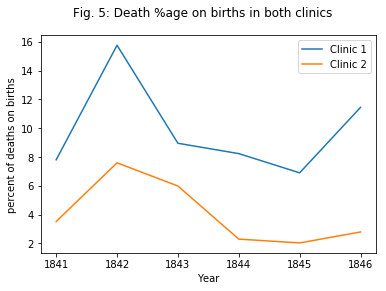

In [17]:
plt.plot(clinic1.year, clinic1.percent, label="Clinic 1")
plt.plot(clinic2.year, clinic2.percent, label="Clinic 2")
plt.legend(loc="best")
plt.ylabel("percent of deaths on births")
plt.xlabel("Year")
plt.suptitle("Fig. 5: Death %age on births in both clinics")
_ = plt.plot()

In [18]:
avg_c1 = clinic1.deaths.sum() *100/ clinic1.births.sum()
print("average rate of death in clinic1 :", avg_c1)

average rate of death in clinic1 : 9.924159265542361


In [19]:
avg_c2 = clinic2.deaths.sum() *100/ clinic2.births.sum()
print("average rate of death in clinic1 :", avg_c2)

average rate of death in clinic1 : 3.883986285200382


In order to figure out the cause for more deaths in clinic 1 Dr. Semmelweis did many experiments. He had women in clinic 1 give birth on their side as in clinic 2. He asked preiest to not ring bell when he walks among patients in clinic1. But nothing changed

After a pathologist died from finger pricking a patient, who died from childbed fever, he observed that the symptoms in both the patologist and the patient are the same. The big diffrence in both clinics was that the doctor were performing autopsies too.

So he made a hypothesis that when doctors and students were performing autopsies they carried "cadaverous particles" from corpses and when delivering babies these got inside women's bodies, that made them sick and they died.

In [20]:
total_1847 = monthly_deaths[monthly_deaths.date <= pd.to_datetime('1847-12-01')]
total_1848 = monthly_deaths[monthly_deaths.date > pd.to_datetime('1847-12-01')]
print("average death rate till 1847 : ", (total_1847.deaths.sum()*100/ total_1847.births.sum()))
print("average death rate after 1847 : ", (total_1848.deaths.sum()*100/ total_1848.births.sum()))

average death rate till 1847 :  9.882308985615543
average death rate after 1847 :  1.809002944888515


This was when he ordered everyone to wash hands with Chlorine solution(chlorine to kill the smell). As we can see in Fig. 2, from year 1847 onwards, the rate of deaths significantly decreased from almost 10% to 2%.

Refrences:

[1] https://www.kaggle.com/arijit75/survey-data

[2] https://www.npr.org/sections/health-shots/2015/01/12/375663920/the-doctor-who-championed-hand-washing-and-saved-women-s-lives

[3] https://en.wikipedia.org/wiki/Ignaz_Semmelweis